# Heart Disease Classification

# Contents:
1. **Importing Libraries**  
    1.1 Loading Data  
    1.2 Looking for Missing Values
2. **Detecting and dealing with Outliers**  
    2.1 Outlier Detection

## 1. Importing Lbiraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### 1.1 Loading Data

In [2]:
df = pd.read_csv("cardio_train.csv", delimiter=';')

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### 1.2 Looking for missing values

In [4]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

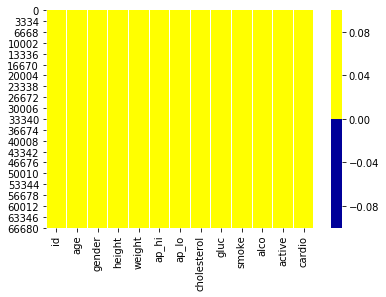

In [5]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
age - 0.0%
gender - 0.0%
height - 0.0%
weight - 0.0%
ap_hi - 0.0%
ap_lo - 0.0%
cholesterol - 0.0%
gluc - 0.0%
smoke - 0.0%
alco - 0.0%
active - 0.0%
cardio - 0.0%


## 2.Detecting and dealing with Outlier Data

In [7]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

## 2.1 Outlier Detection

In [8]:
df.ap_hi.describe()

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [9]:
df.ap_lo.describe()

count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

### 2.2 Outlier Removal 

In [1]:
#For loop to remove outlier data and leave with new Dataframe without outliers:
def terriblfunc(df):
    list1 = [out_hidi, out_lodi]
    new_df = df
    for i in list1:
        new_df = new_df[i]
    new_df.reset_index(drop=True)
    return new_df

In [111]:
# out_hidi = df['ap_lo'] < 150
# out_hidi.sum()
# no_lo_dis_df = df[out_hidi]
# no_lo_dis = no_lo_dis_df['ap_lo'] < 150
# no_lo_dis.sum()

69017

In [96]:
out_lodi = df['ap_lo'] > 40
out_lodi.sum()

69924

In [97]:
out_hisys = df['ap_hi'] < 210

In [98]:
out_hisys.sum()

69902

In [99]:
out_losys = df['ap_hi'] > 70

In [100]:
out_losys.sum()

69793

In [101]:
out_height = df['height'] > 120
out_height.sum()

69914

In [102]:
out_weight = df['weight'] > 40

In [103]:
out_weight.sum()

69906

In [104]:
new_df = terriblfunc(df)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [105]:
new_tallies = new_df['height'] < 120

In [106]:
new_tallies.sum()

51